# FOR 1st material

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('C:/Users/satyarth/Desktop/mmx/set_1.xlsx')

# Print the first few rows to check the structure of the data
print(data.head())



     Material                               Description    Range       Subcat  \
0      511209  SleekEssence PVC Cis with Odoniser(SF)SW      NaN  PVC CISTERN   
1      507924         PVC Cistern "SLEEK SMART" SB - WH      NaN  PVC CISTERN   
2   F360006CP                         ANGULAR STOP COCK  ELEMENT  ANGLE VALVE   
3   F360010CP                   BATH SPOUT WITH TIP TON  ELEMENT        SPOUT   
4  F280009DCP  CENTRAL HOLE BASIN MIXER W/O POPUP WASTE    FLORA         CHBM   

   Apr 21 Actual  May 21 Actual  Jun 21 Actual  Jul 21 Actual  Aug 21 Actual  \
0          12906           9342          39993          18852          76164   
1          11441           8876          28731          12286          60893   
2           2903           1112           4377           4331           6478   
3            925            130           1064            620           1193   
4            667            107            951           1640           2349   

   Sep 21 Actual  ...  Feb 23 Ac

In [14]:
# Clean column names: remove " Actual" suffix and strip whitespace
cleaned_columns = monthly_data.index.str.replace(" Actual", "").str.strip()

# Convert to datetime
months = pd.to_datetime(cleaned_columns, format="%b %y") + pd.offsets.MonthEnd(1)

values = pd.to_numeric(monthly_data.values, errors='coerce')


In [12]:
months = pd.to_datetime(cleaned_columns, format="%b %y") + pd.offsets.MonthEnd(1)
print(months)


DatetimeIndex(['2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', freq=None)


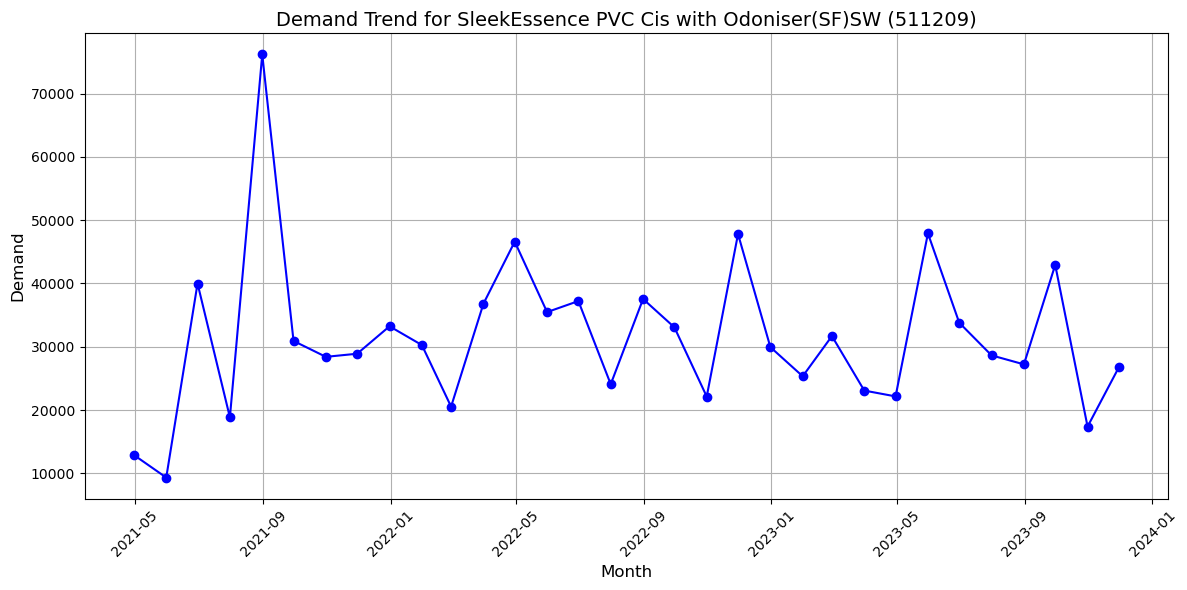

In [13]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(months, values, marker='o', linestyle='-', color='blue')
plt.title(f'Demand Trend for {material_name} ({material_code})', fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Demand", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

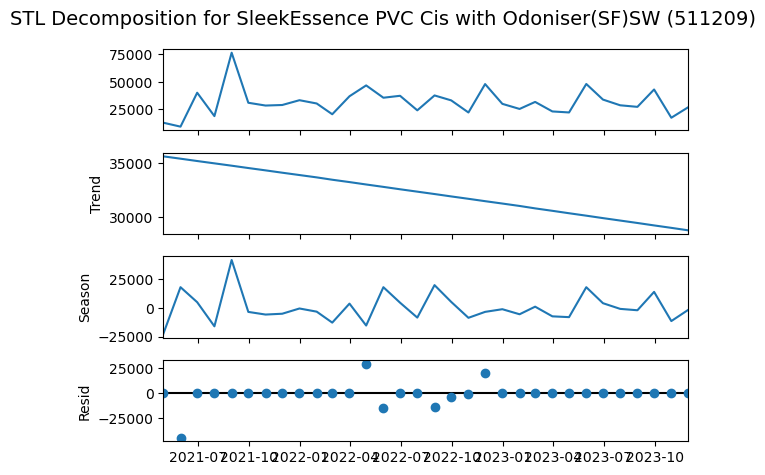

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Prepare the time series
months = pd.to_datetime(cleaned_columns, format="%b %y") + pd.offsets.MonthEnd(1)
values = pd.to_numeric(monthly_data.values, errors='coerce')
ts = pd.Series(values, index=months)

# STL Decomposition
stl = STL(ts, period=12, robust=True)
result = stl.fit()

# Plotting
result.plot()
plt.suptitle(f'STL Decomposition for {material_name} ({material_code})', fontsize=14)
plt.tight_layout()
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller

# Create time series
ts = pd.Series(values, index=months)

# Perform ADF test
adf_result = adfuller(ts.dropna())

# Display results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

# Interpretation
if adf_result[1] < 0.05:
    print("✅ The series is stationary (reject null hypothesis).")
else:
    print("❌ The series is non-stationary (fail to reject null hypothesis).")


ADF Statistic: -5.044946260770663
p-value: 1.806935063229582e-05
Critical Value (1%): -3.6699197407407405
Critical Value (5%): -2.9640707407407407
Critical Value (10%): -2.621171111111111
✅ The series is stationary (reject null hypothesis).


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Material        6 non-null      object
 1   Description     6 non-null      object
 2   Range           4 non-null      object
 3   Subcat          6 non-null      object
 4   Apr 21 Actual   6 non-null      int64 
 5   May 21 Actual   6 non-null      int64 
 6   Jun 21 Actual   6 non-null      int64 
 7   Jul 21 Actual   6 non-null      int64 
 8   Aug 21 Actual   6 non-null      int64 
 9   Sep 21 Actual   6 non-null      int64 
 10  Oct 21 Actual   6 non-null      int64 
 11  Nov 21 Actual   6 non-null      int64 
 12  Dec 21 Actual   6 non-null      int64 
 13  Jan 22 Actual   6 non-null      int64 
 14  Feb 22 Actual   6 non-null      int64 
 15  Mar 22 Actual   6 non-null      int64 
 16  Apr 22 Actual   6 non-null      int64 
 17  May 22 Actual   6 non-null      int64 
 18 

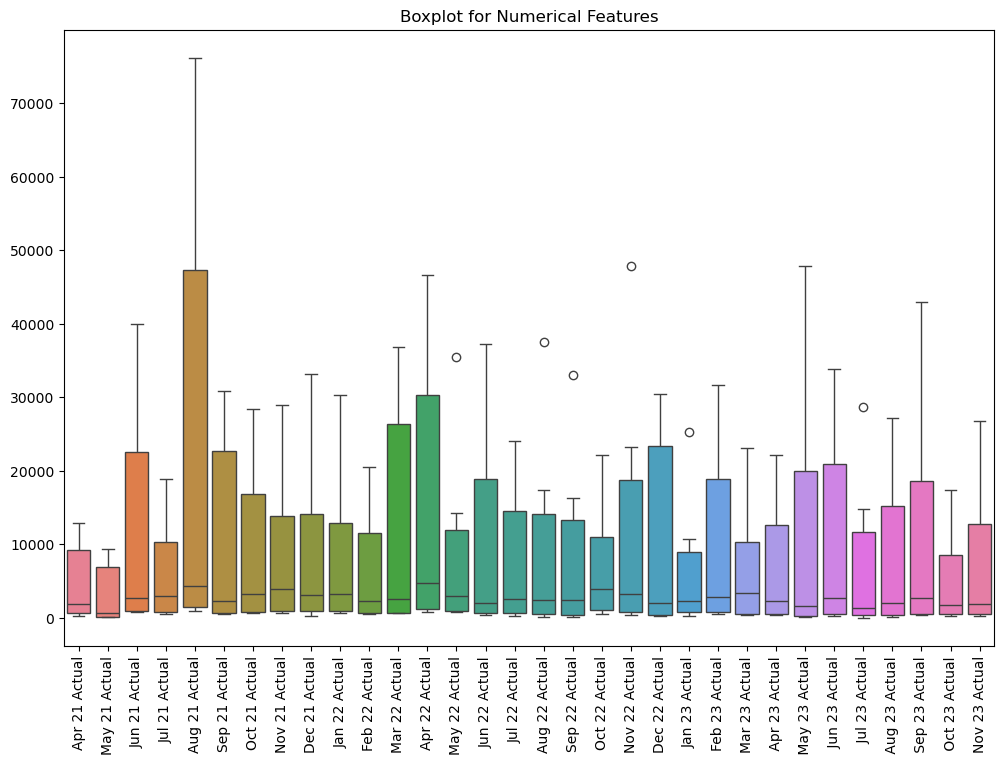

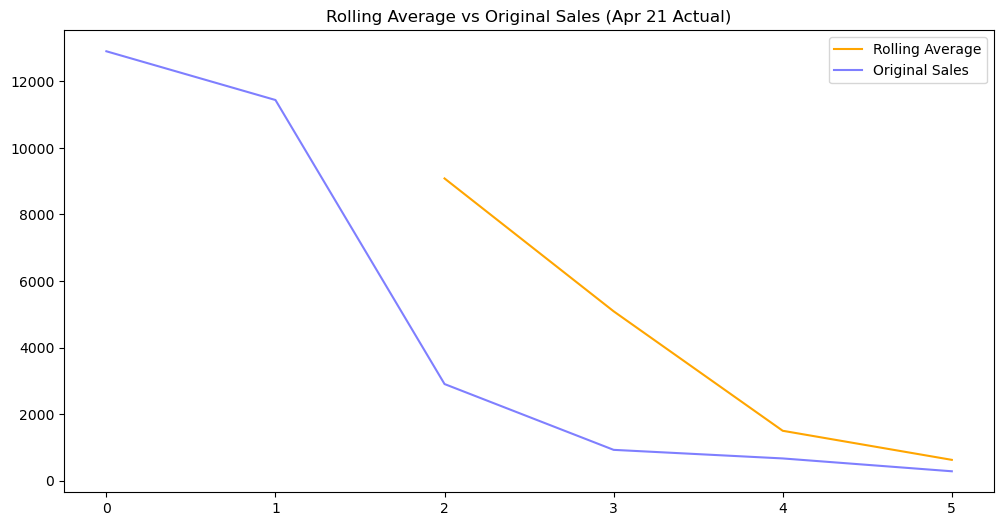

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a pandas DataFrame
# Replace the path with your actual CSV or dataset loading step
df = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')

# 1. Basic information
print("Data Overview:")
print(df.info())

# 2. Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# 3. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 5. Boxplots for detecting outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=90)
plt.show()

# 6. Trend over time (rolling average of sales for one SKU as an example)
df['rolling_avg'] = df['Apr 21 Actual'].rolling(window=3).mean()
plt.figure(figsize=(12, 6))
df['rolling_avg'].plot(label='Rolling Average', color='orange')
df['Apr 21 Actual'].plot(label='Original Sales', color='blue', alpha=0.5)
plt.title('Rolling Average vs Original Sales (Apr 21 Actual)')
plt.legend()
plt.show()


In [27]:

import pandas as pd

# Melt the DataFrame to long format
df_long = df.melt(id_vars=['Material', 'Description'], 
                  value_vars=[col for col in df.columns if 'Actual' in col],
                  var_name='Month', 
                  value_name='Sales')

# Convert 'Month' to datetime format (optional, depending on your data)
months = pd.to_datetime(cleaned_columns, format="%b %y") + pd.offsets.MonthEnd(1)
# Create lagged features
def create_lagged_features(df, lags=3):
    df_lagged = df.copy()
    for i in range(1, lags + 1):
        df_lagged[f"lag_{i}"] = df_lagged.groupby('Material')['Sales'].shift(i)  # Lag by SKU (Material)
    df_lagged.dropna(inplace=True)  # Remove missing values due to lagging
    return df_lagged

# Apply the lag function to create the lagged dataframe
df_lagged = create_lagged_features(df_long, lags=3)

# Set features (X) and target (y)
X = df_lagged.drop(columns=['Sales', 'Material', 'Description', 'Month'])  # Drop 'Sales', 'Material', 'Description', 'Month'
y = df_lagged['Sales']  # Target column

# Train-Test Split (using 25% for test, you can adjust as needed)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)



In [29]:
print(df_long.columns)

Index(['Material', 'Description', 'Month', 'Sales'], dtype='object')


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller

from prophet import Prophet

# Step 1: Extract date columns
date_columns = [col for col in df.columns if 'Actual' in col]
cleaned_columns = [col.replace(' Actual', '').strip() for col in date_columns]
months = pd.to_datetime(cleaned_columns, format="%b %y") + pd.offsets.MonthEnd(1)

# Step 2: Reshape data
df_long = df.melt(id_vars=['Material', 'Description'],
                  value_vars=date_columns,
                  var_name='Month', value_name='Sales')
df_long['Month'] = df_long['Month'].str.replace(' Actual', '').str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format="%b %y") + pd.offsets.MonthEnd(1)
df_long = df_long.sort_values(['Material', 'Month'])

# Step 3: Select first SKU
first_material = df_long['Material'].unique()[0]
sku_data = df_long[df_long['Material'] == first_material].copy()
sku_data = sku_data.sort_values('Month')
ts = sku_data.set_index('Month')['Sales'].astype(float)

# Step 4: Split data
train = ts[:-4]
test = ts[-4:]
forecast_horizon = 3

results = {}
print(f"Material: {first_material}, Description: {sku_data['Description'].iloc[0]}\n")

# === Model 1: Naive Forecast ===
naive_forecast = pd.Series([train.iloc[-1]] * len(test), index=test.index)
results['Naive_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], naive_forecast[:forecast_horizon]) * 100, 2)

# === Model 2: Moving Average ===
ma_forecast = pd.Series([train.rolling(3).mean().iloc[-1]] * len(test), index=test.index)
results['MovingAvg_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], ma_forecast[:forecast_horizon]) * 100, 2)

# === Model 3: Exponential Smoothing ===
try:
    es_model = ExponentialSmoothing(train, trend='add', seasonal=None)
    es_fit = es_model.fit()
    es_forecast = es_fit.forecast(len(test))
    results['ETS_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], es_forecast[:forecast_horizon]) * 100, 2)
except:
    results['ETS_MAPE'] = None

# === Model 4: ARIMA ===
try:
    d = 1 if adfuller(train)[1] > 0.05 else 0
    arima_model = ARIMA(train, order=(1, d, 1))
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(len(test))
    results['ARIMA_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], arima_forecast[:forecast_horizon]) * 100, 2)
except:
    results['ARIMA_MAPE'] = None

# === Model 5: SARIMA ===
try:
    sarima_model = SARIMAX(train, order=(1, d, 1), seasonal_order=(1, 1, 1, 12))
    sarima_fit = sarima_model.fit()
    sarima_forecast = sarima_fit.forecast(len(test))
    results['SARIMA_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], sarima_forecast[:forecast_horizon]) * 100, 2)
except:
    results['SARIMA_MAPE'] = None

# === Model 6: Prophet ===
try:
    prophet_df = train.reset_index()
    prophet_df.columns = ['ds', 'y']
    prophet_model = Prophet()
    prophet_model.fit(prophet_df)

    future = prophet_model.make_future_dataframe(periods=forecast_horizon, freq='M')
    prophet_forecast = prophet_model.predict(future)

    forecast_vals = prophet_forecast[['ds', 'yhat']].set_index('ds').iloc[-forecast_horizon:]['yhat']
    test_vals = test[:forecast_horizon]
    results['Prophet_MAPE'] = round(mean_absolute_percentage_error(test_vals, forecast_vals) * 100, 2)
except:
    results['Prophet_MAPE'] = None

# === Summary ===
results_df = pd.DataFrame([results])
results_df.index = [f"{first_material}"]
best_model = results_df.T.dropna().sort_values(by=first_material).index[0]
results_df['Best_Model'] = best_model
results_df['Best_MAPE'] = results_df.loc[first_material, best_model]
results_df['Good_Model'] = "Yes" if results_df['Best_MAPE'].values[0] < 10 else "No"

print(results_df.T)


Material: 507924, Description: PVC Cistern "SLEEK SMART" SB - WH



12:59:07 - cmdstanpy - INFO - Chain [1] start processing
12:59:07 - cmdstanpy - INFO - Chain [1] done processing


                    507924
Naive_MAPE           33.75
MovingAvg_MAPE       44.68
ETS_MAPE             52.07
ARIMA_MAPE           53.16
SARIMA_MAPE         112.97
Prophet_MAPE         66.73
Best_Model      Naive_MAPE
Best_MAPE            33.75
Good_Model              No


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller

from prophet import Prophet

# 1. Convert columns to proper dates
date_columns = [col for col in df.columns if 'Actual' in col]
cleaned_columns = [col.replace(' Actual', '').strip() for col in date_columns]
months = pd.to_datetime(cleaned_columns, format="%b %y") + pd.offsets.MonthEnd(1)

# 2. Reshape Data
df_long = df.melt(id_vars=['Material', 'Description'],
                  value_vars=date_columns,
                  var_name='Month', value_name='Sales')
df_long['Month'] = df_long['Month'].str.replace(' Actual', '').str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format="%b %y") + pd.offsets.MonthEnd(1)
df_long = df_long.sort_values(['Material', 'Month'])

# 3. Select first SKU
first_material = df_long['Material'].unique()[0]
sku_data = df_long[df_long['Material'] == first_material].copy()
sku_data = sku_data.sort_values('Month')
ts = sku_data.set_index('Month')['Sales'].astype(float)

# 4. Train-Test Split
train = ts[:-4]
test = ts[-4:]
forecast_horizon = 3

results = {}
forecasts = {}
print(f"\nMaterial: {first_material}\nDescription: {sku_data['Description'].iloc[0]}\n")

# === Model 1: Naive ===
naive_forecast = pd.Series([train.iloc[-1]] * forecast_horizon, index=pd.date_range(train.index[-1] + pd.offsets.MonthEnd(1), periods=forecast_horizon, freq='M'))
results['Naive_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], naive_forecast[:forecast_horizon]) * 100, 2)
forecasts['Naive'] = naive_forecast

# === Model 2: Moving Average ===
moving_avg_value = train.rolling(3).mean().iloc[-1]
ma_forecast = pd.Series([moving_avg_value] * forecast_horizon, index=naive_forecast.index)
results['MovingAvg_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], ma_forecast[:forecast_horizon]) * 100, 2)
forecasts['MovingAvg'] = ma_forecast

# === Model 3: Exponential Smoothing (ETS) ===
try:
    es_model = ExponentialSmoothing(train, trend='add', seasonal=None)
    es_fit = es_model.fit()
    es_forecast = es_fit.forecast(forecast_horizon)
    results['ETS_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], es_forecast[:forecast_horizon]) * 100, 2)
    forecasts['ETS'] = es_forecast
except:
    results['ETS_MAPE'] = None

# === Model 4: ARIMA ===
try:
    d = 1 if adfuller(train)[1] > 0.05 else 0
    arima_model = ARIMA(train, order=(1, d, 1))
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(forecast_horizon)
    results['ARIMA_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], arima_forecast[:forecast_horizon]) * 100, 2)
    forecasts['ARIMA'] = arima_forecast
except:
    results['ARIMA_MAPE'] = None

# === Model 5: SARIMA ===
try:
    sarima_model = SARIMAX(train, order=(1, d, 1), seasonal_order=(1, 1, 1, 12))
    sarima_fit = sarima_model.fit()
    sarima_forecast = sarima_fit.forecast(forecast_horizon)
    results['SARIMA_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], sarima_forecast[:forecast_horizon]) * 100, 2)
    forecasts['SARIMA'] = sarima_forecast
except:
    results['SARIMA_MAPE'] = None

# === Model 6: Prophet ===
try:
    prophet_df = train.reset_index()
    prophet_df.columns = ['ds', 'y']
    prophet_model = Prophet()
    prophet_model.fit(prophet_df)

    future = prophet_model.make_future_dataframe(periods=forecast_horizon, freq='M')
    prophet_forecast = prophet_model.predict(future)
    forecast_vals = prophet_forecast[['ds', 'yhat']].set_index('ds').iloc[-forecast_horizon:]['yhat']
    results['Prophet_MAPE'] = round(mean_absolute_percentage_error(test[:forecast_horizon], forecast_vals) * 100, 2)
    forecasts['Prophet'] = forecast_vals
except:
    results['Prophet_MAPE'] = None

# === Result Summary ===
results_df = pd.DataFrame([results]).T
results_df.columns = ['MAPE (%)']
results_df = results_df.sort_values(by='MAPE (%)')
best_model = results_df.index[0]
results_df['Best_Model'] = results_df.index == best_model
results_df['Good_Model'] = results_df['MAPE (%)'] < 10

# === Forecast Output ===
forecast_output = pd.DataFrame({model: forecasts[model] for model in forecasts})
forecast_output.columns = [f"{col} Forecast" for col in forecast_output.columns]

print("\n📊 Forecasted Values for Next 3 Months:")
print(forecast_output)

print("\n📉 MAPE Summary (%):")
print(results_df)

print(f"\n✅ Best Model: {best_model} with MAPE = {results_df.loc[best_model, 'MAPE (%)']}%")



Material: 507924
Description: PVC Cistern "SLEEK SMART" SB - WH



13:01:17 - cmdstanpy - INFO - Chain [1] start processing
13:01:17 - cmdstanpy - INFO - Chain [1] done processing



📊 Forecasted Values for Next 3 Months:
            Naive Forecast  MovingAvg Forecast  ETS Forecast  ARIMA Forecast  \
2023-08-31         14859.0             22279.0  23752.746368    23093.315855   
2023-09-30         14859.0             22279.0  23857.979425    19157.631208   
2023-10-31         14859.0             22279.0  23963.212481    23090.435708   

            SARIMA Forecast  Prophet Forecast  
2023-08-31     54546.844484     -11570.674870  
2023-09-30     29804.189991      15043.096830  
2023-10-31     23618.971236       9946.457958  

📉 MAPE Summary (%):
                MAPE (%)  Best_Model  Good_Model
Naive_MAPE         33.75        True       False
MovingAvg_MAPE     44.68       False       False
ETS_MAPE           52.07       False       False
ARIMA_MAPE         53.16       False       False
Prophet_MAPE       66.73       False       False
SARIMA_MAPE       112.97       False       False

✅ Best Model: Naive_MAPE with MAPE = 33.75%


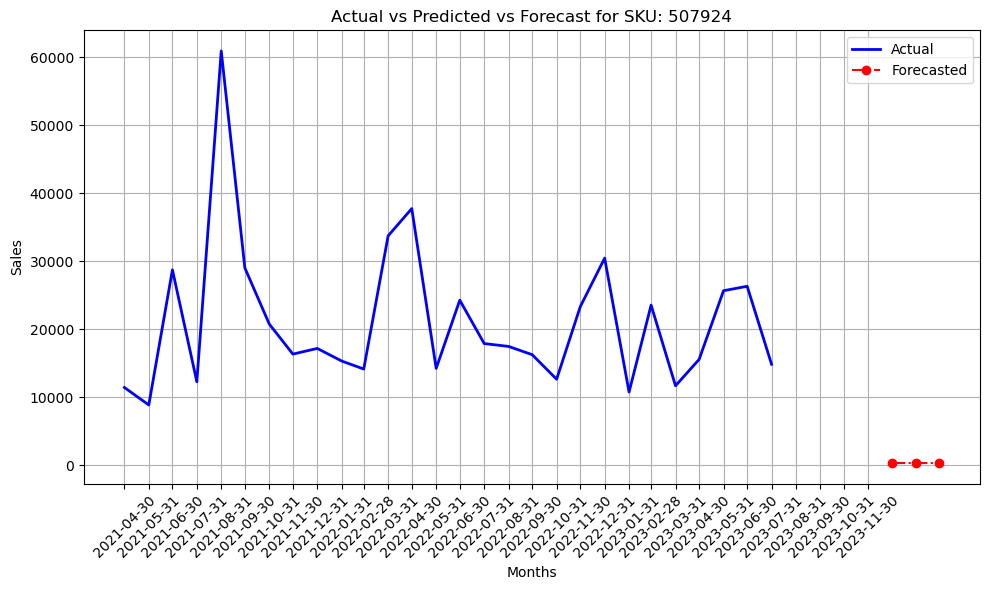

In [36]:
import matplotlib.pyplot as plt

# Assuming 'best_model' holds the model name only, e.g., 'Naive', 'MovingAvg', etc.
# Extract forecast values for the best model based on its MAPE score
if best_model == "Naive":
    best_forecast = naive_forecast
elif best_model == "MovingAvg":
    best_forecast = ma_forecast
elif best_model == "ETS":
    best_forecast = es_forecast
elif best_model == "ARIMA":
    best_forecast = arima_forecast
elif best_model == "SARIMA":
    best_forecast = sarima_forecast
elif best_model == "Prophet":
    best_forecast = forecast_vals

# Ensure 'best_forecast' index is set for the forecasted months (next 3 months)
forecast_months = pd.date_range(start=months[-1] + pd.Timedelta(days=1), periods=3, freq='M')

# Plotting
plt.figure(figsize=(10, 6))

# Plot Actual values
plt.plot(train.index, train, label='Actual', color='blue', linewidth=2)

# Plot Predicted values (train period predictions)
if best_model == "Naive":
    plt.plot(naive_forecast.index, naive_forecast, label='Predicted (Naive)', color='orange', linestyle='--')
elif best_model == "MovingAvg":
    plt.plot(ma_forecast.index, ma_forecast, label='Predicted (Moving Avg)', color='orange', linestyle='--')
elif best_model == "ETS":
    plt.plot(es_forecast.index, es_forecast, label='Predicted (ETS)', color='orange', linestyle='--')
elif best_model == "ARIMA":
    plt.plot(arima_forecast.index, arima_forecast, label='Predicted (ARIMA)', color='orange', linestyle='--')
elif best_model == "SARIMA":
    plt.plot(sarima_forecast.index, sarima_forecast, label='Predicted (SARIMA)', color='orange', linestyle='--')
elif best_model == "Prophet":
    plt.plot(forecast_vals.index, forecast_vals, label='Predicted (Prophet)', color='orange', linestyle='--')

# Plot Forecasted values (next 3 months)
plt.plot(forecast_months, best_forecast, label='Forecasted', color='red', linestyle='-.', marker='o')

# Formatting the graph
plt.title(f"Actual vs Predicted vs Forecast for SKU: {first_material}")
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(months, rotation=45)
plt.legend(loc='best')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



In [37]:
{-0.1\height}\faExternalLink}}{July 2024 - Sep. 2024}
      {\underline{Role - Research Intern}}{Mandi, Himachal Pradesh}
      \resumeItemListStart
        \resumeItem{\normalsize{Learned and implemented \textbf{object detection, classification, and segmentation using YOLOv8 and ResNet50}.}}
        \resumeItem{\normalsize{Applied supervised learning techniques to \textbf{detect missing, loose, and corroded nuts and bolts in industrial images}.}}
        \resumeItem{\normalsize{Worked with frameworks such as \textbf{TensorFlow, Ultralytics, OpenCV, and Keras} for model training and evaluation.}}
        \resumeItem{\normalsize{Learned \textbf{machine learning and deep learning} algorithms for improving predictive modeling.}}
        \resumeItem{\normalsize{Utilized research papers for methodology and datasets.}}
      \resumeItemListEnd  
\resumeSubHeadingListEnd
\vspace{-12pt}
%-----------PROJECTS-----------

\section{PROJECTS}
    \vspace{-5pt}
    \resumeSubHeadingListStart

     \resumeProjectHeading
          {\textbf{\large{\underline{Demand Forecasting}}} $|$ \large{\underline{Python, Time Series Analysis}}}\\
          \resumeItemListStart
            \resumeItem{\normalsize{Developed \textbf{Multi-Model Forecasting System} using Python on monthly sales data per product (30+ months).}}
            \resumeItem{\normalsize{Built individual \textbf{Time Series Models (ARIMA, SARIMA, Holt-Winters)} to predict future demand.}}
            \resumeItem{\normalsize{\textbf{Forecasted next 3 months} with a 4-month test window, improving forecast accuracy and reliability.}}
            \resumeItem{\normalsize{Enabled data-driven inventory planning by delivering product-level demand predictions.}}
          \resumeItemListEnd 
          \vspace{-13pt}

     \resumeProjectHeading
          {\textbf{\large{\underline{Startup Prediction}}} $|$ \large{\underline{Python, NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn}}}\\
          \resumeItemListStart
            \resumeItem{\normalsize{Developed and implemented \textbf{Multiple Linear Regression} model to predict startup profits based on R\&D Spend and Marketing spend.}}
            \resumeItem{\normalsize{Evaluated model performance using metrics such as \textbf{MAE, MSE, RMSE, R², and Adjusted R²}, achieving a strong predictive fit.}}
            \resumeItem{\normalsize{Visualized data and regression results using \textbf{Matplotlib and Seaborn} for clearer insights.}}
          \resumeItemListEnd 
          \vspace{-13pt}

     \resumeProjectHeading
          {\textbf{\large{\underline{Nut-Bolt Detection}}} $|$ \large{\underline{Python, TensorFlow, Ultralytics, YOLOv8}}}\\
          \resumeItemListStart
            \resumeItem{\normalsize{Implemented \textbf{YOLOv8 for detecting nuts, bolts, and corroded bolts} using Ultralytics.}}
            \resumeItem{\normalsize{Optimized detection accuracy with \textbf{image segmentation} and preprocessing techniques.}}
            \resumeItem{\normalsize{Applied the model on real-world industrial datasets for robust \textbf{bolt and corrosion detection}.}}
          \resumeItemListEnd 
          \vspace{-9pt}

    \resumeSubHeadingListEnd

         
          
%-----------PROGRAMMING SKILLS-----------
\section{TECHNICAL SKILLS}
 \begin{itemize}[leftmargin=0.15in, label={}]
    \small{\item{
     \textbf{\normalsize{Languages:}}{  \normalsize{Python, C,C++,SQL}} \\
     \textbf{\normalsize{Libraries/Frameworks:}}{  \normalsize{Numpy, Pandas, Matplotlib, Seaborn, scikit-learn, Tensorflow, Ultralytics, YOLOv8 }} \\
     \textbf{\normalsize{Developer Tools:}}{  \normalsize{Google Colab, Jupyter Notebook, VS Code, Canva.}}\\
     \textbf{Coursework:} DSA, Operating Systems, OOPs Concepts, Computer Networks, Machine Learning, Software Engineering \\
    }\\
    }}
 \end{itemize}
 \vspace{-15pt}


  %-----------CERTIFICATIONS---------------
\section{CERTIFICATIONS}

$\sbullet[.75] \hspace{0.2cm}${\href{https://drive.google.com/file/d/1BnFfnqnwgyVmUSrTCw1Exc17YBzO0I17/view?usp=sharing}{Python Programming - Udemy}} \hspace{1cm}\\
$\sbullet[.75] \hspace{0.1cm}$ {\href{https://drive.google.com/file/d/1HKA8dZy6irjIayGt6oCfD7hCXU0Aop5p/view?usp=sharing}{C++ Programming - Udemy}} \hspace{1.6cm}\\
$\sbullet[.75] \hspace{0.2cm}${\href{#}{Comprehensive
SQL - Udemy}} \hspace{1cm}\\




 %-----------EXTRACURRICULAR-----------
\section{EXTRACURRICULAR ACTIVITIES}
$\sbullet[.75] \hspace{0.1cm}$ Participated in Intra College hackathon, developing a Music Player Website and gaining practical expertise in HTML, CSS, and JavaScript \\
$\sbullet[.75] \hspace{0.1cm}$ GSSoC'24 Contributor at GirlScript Summer of Code \\
 
 \end{document}

SyntaxError: unexpected character after line continuation character (3251214770.py, line 1)